In [75]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore
import numpy as np
import pandas as pd
from tabulate import tabulate

In [86]:
def process_data(filename, type="sleep"):
    data = pd.read_pickle(filename)[type]
    split_dfs = {}
    
    for n in data:  # 5, 35
        for language in data[n]:  # rust, cpp, nonservice
            summary_rows = []
            for df in data[n][language]: #each experiment
                if "PACKAGE_ENERGY (J)" in df.columns:
                    energy = df["PACKAGE_ENERGY (J)"].iloc[-1] - df["PACKAGE_ENERGY (J)"].iloc[0]
                    if "TIME" in df.columns:
                        time_diff = df['TIME'].iloc[-1] - df['TIME'].iloc[0]
                    elif "Time" in df.columns:
                        time_diff = df['Time'].iloc[-1] - df['Time'].iloc[0]
                    summary_rows.append({
                        "PACKAGE ENERGY (J)": energy,
                        "EDP": time_diff,
                        "tool": language,
                        "type": n
                    })
                

            summary_df = pd.DataFrame(summary_rows)
            # remove outliers from each experiment set
            if 'PACKAGE ENERGY (J)' in summary_df.columns:
                z_scores = zscore(summary_df['PACKAGE ENERGY (J)'])
                full_df = summary_df[np.abs(z_scores) < 3]

            split_dfs[f"{language}_{type}_{n}"] = full_df
    
    return split_dfs

In [87]:
data_sleep = process_data("results_sleep.pkl", "sleep")
data_sleep_p_data = [
    ["Rust", shapiro(data_sleep['rust_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['rust_sleep_20']['PACKAGE ENERGY (J)'])[1]],
    ["C++", shapiro(data_sleep['cpp_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['cpp_sleep_20']['PACKAGE ENERGY (J)'])[1]],
    ["Classic", shapiro(data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['nonservice_sleep_20']['PACKAGE ENERGY (J)'])[1]]
]
print(tabulate(data_sleep_p_data, headers=["Type", "Sleep(10)", "Sleep(20)"], tablefmt="grid"))


+---------+-------------+-------------+
| Type    |   Sleep(10) |   Sleep(20) |
+=========+=============+=============+
| Rust    |    0.815208 |    0.296947 |
+---------+-------------+-------------+
| C++     |    0.421539 |    0.244119 |
+---------+-------------+-------------+
| Classic |    0.787301 |    0.582325 |
+---------+-------------+-------------+


/tmp/ipykernel_11144/1255154925.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/1255154925.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Rust Service", "C++ Service", "Classic"])


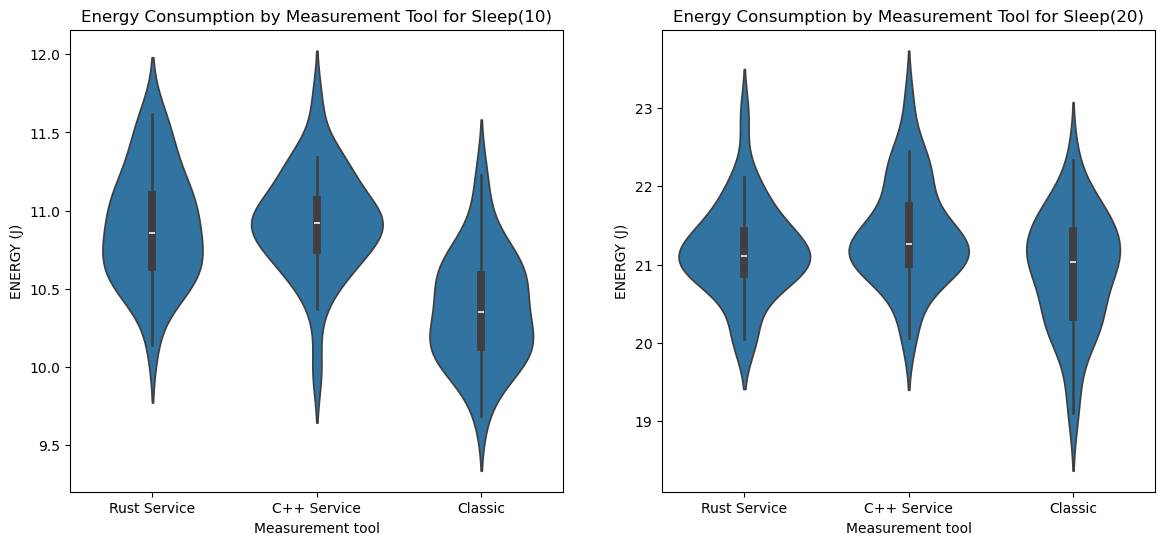

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax = sns.violinplot(ax=axes[0], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]))
axes[0].set_title("Energy Consumption by Measurement Tool for Sleep(10)")
axes[0].set_xlabel("Measurement tool")
axes[0].set_ylabel("ENERGY (J)")
axes[0].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

ax = sns.violinplot(ax=axes[1], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]))
axes[1].set_title("Energy Consumption by Measurement Tool for Sleep(20)")
axes[1].set_xlabel("Measurement tool")
axes[1].set_ylabel("ENERGY (J)")
axes[1].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

# plt.tight_layout()
plt.show()

/tmp/ipykernel_11144/552352203.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/552352203.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])


Text(0, 0.5, '')

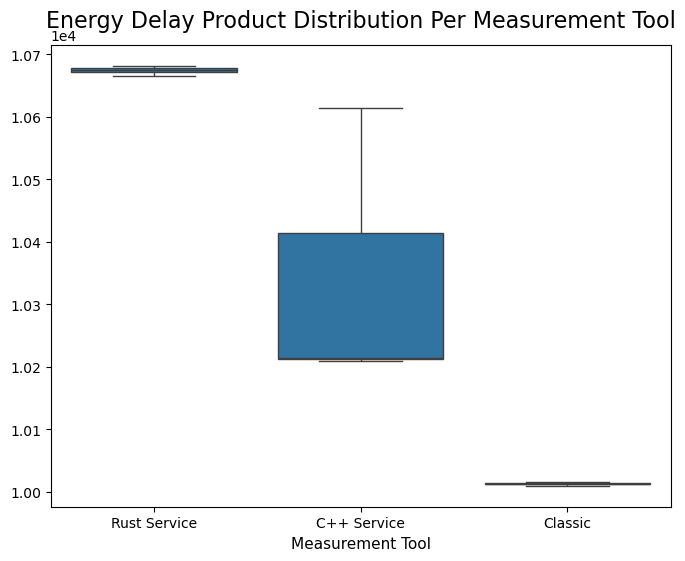

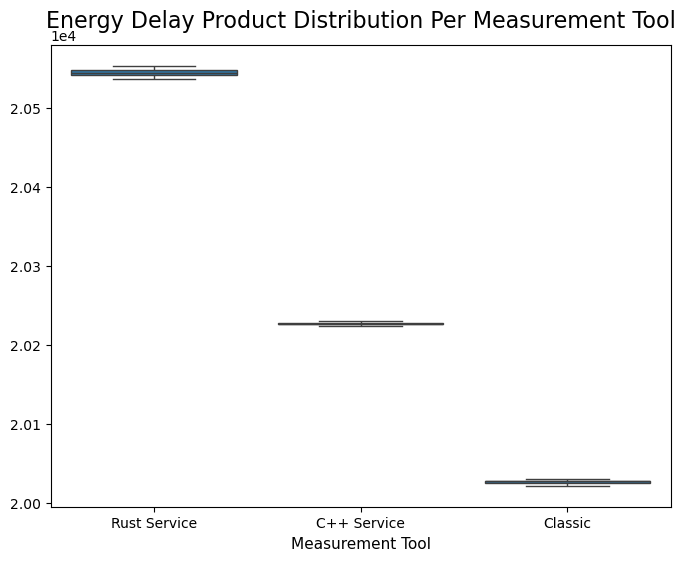

In [96]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Measurement Tool', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Measurement Tool', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')